In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


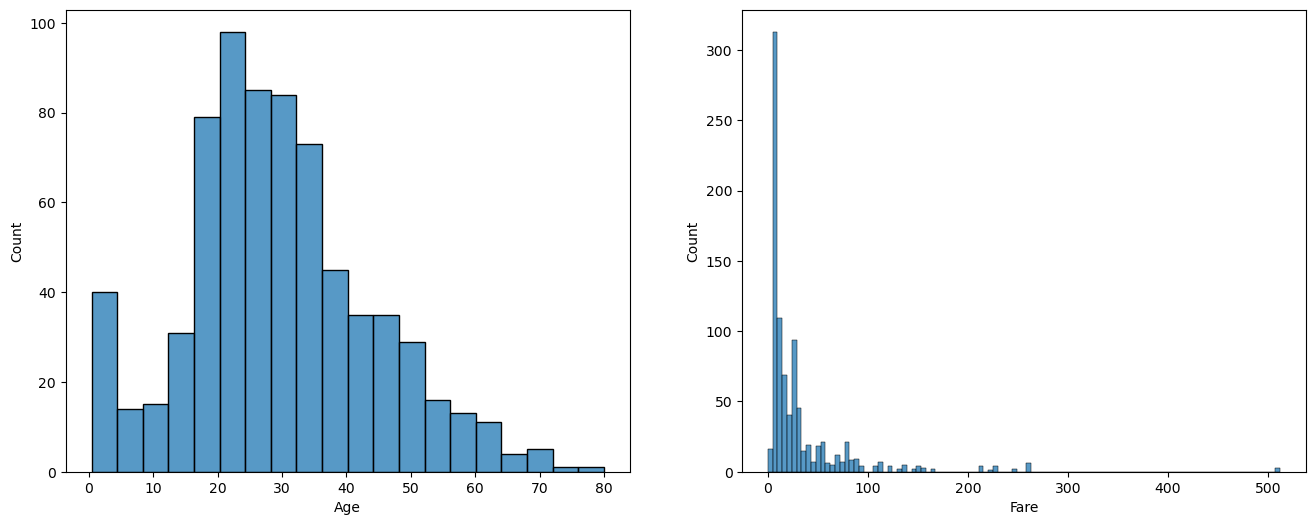

In [10]:
fig, axs = plt.subplots(1,2,figsize=(16,6), gridspec_kw={'wspace': 0.2})
sns.histplot(df['Age'], ax = axs[0])
sns.histplot(df['Fare'], ax = axs[1])
plt.show()

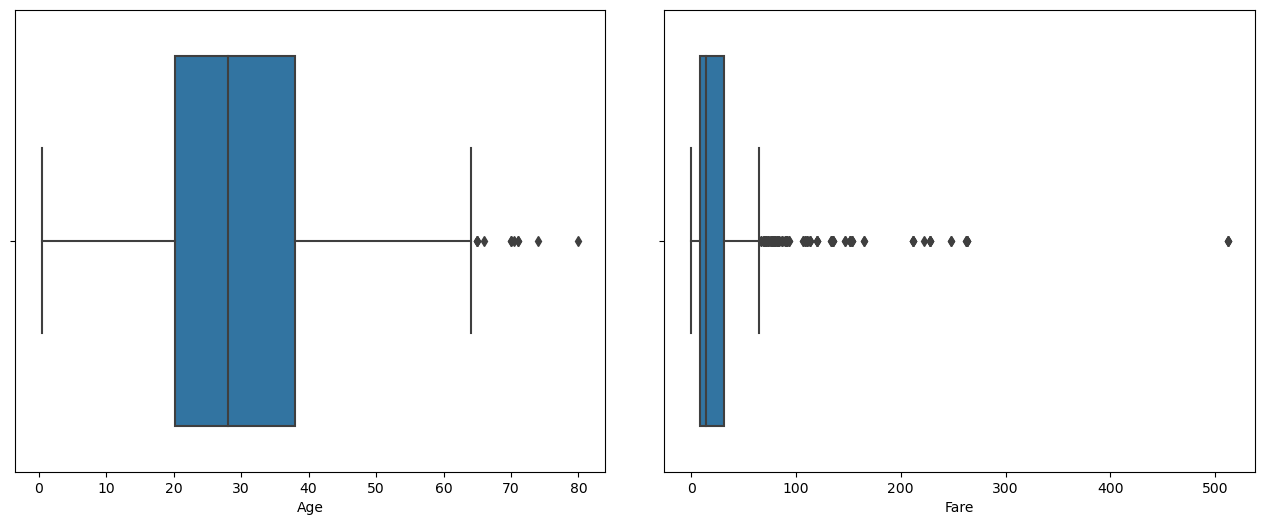

In [11]:
fig, axs = plt.subplots(1,2,figsize=(16,6), gridspec_kw={'wspace': 0.1})
sns.boxplot(x = df['Age'], ax = axs[0])
sns.boxplot(x = df['Fare'], ax = axs[1])
plt.show()

In [12]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower_extreme = Q1 - 1.5*IQR
upper_extreme = Q3 + 1.5*IQR

In [13]:
outlier_age = df[(df.Age<lower_extreme)|(df.Age>upper_extreme)]
print("the shape is:" ,outlier_age.shape)
print("-" * 20)
outlier_age.head(11)

the shape is: (11, 12)
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [14]:
Q1 = df.Fare.quantile(0.25)
Q3 = df.Fare.quantile(0.75)
IQR = Q3 - Q1
lower_extreme = Q1 - 1.5*IQR
upper_extreme = Q3 + 1.5*IQR

In [15]:
outlier_Fare = df[(df.Fare<lower_extreme)|(df.Fare>upper_extreme)]
print("the shape is:",outlier_Fare.shape)
print("-" * 20)
(outlier_Fare.head())

the shape is: (116, 12)
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


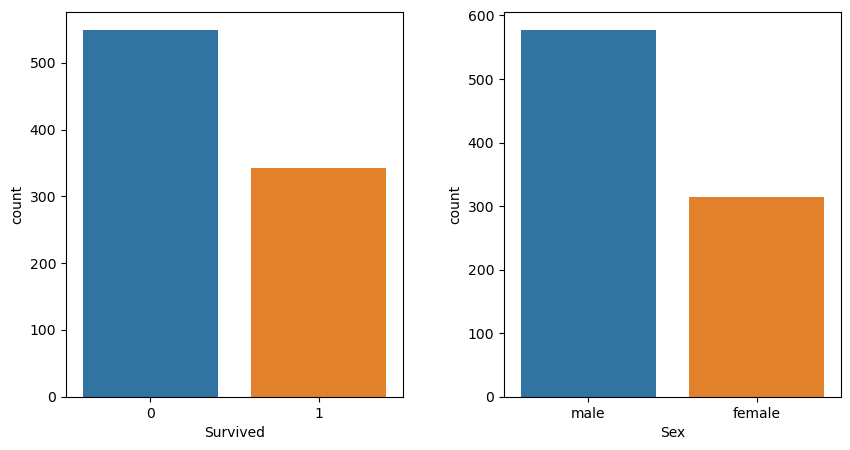

In [16]:
fig, axs = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'wspace': 0.3})
sns.countplot(x='Survived', data = df, palette = 'tab10', ax = axs[0])
sns.countplot(x='Sex', data = df, palette = 'tab10', ax = axs[1])
plt.show()

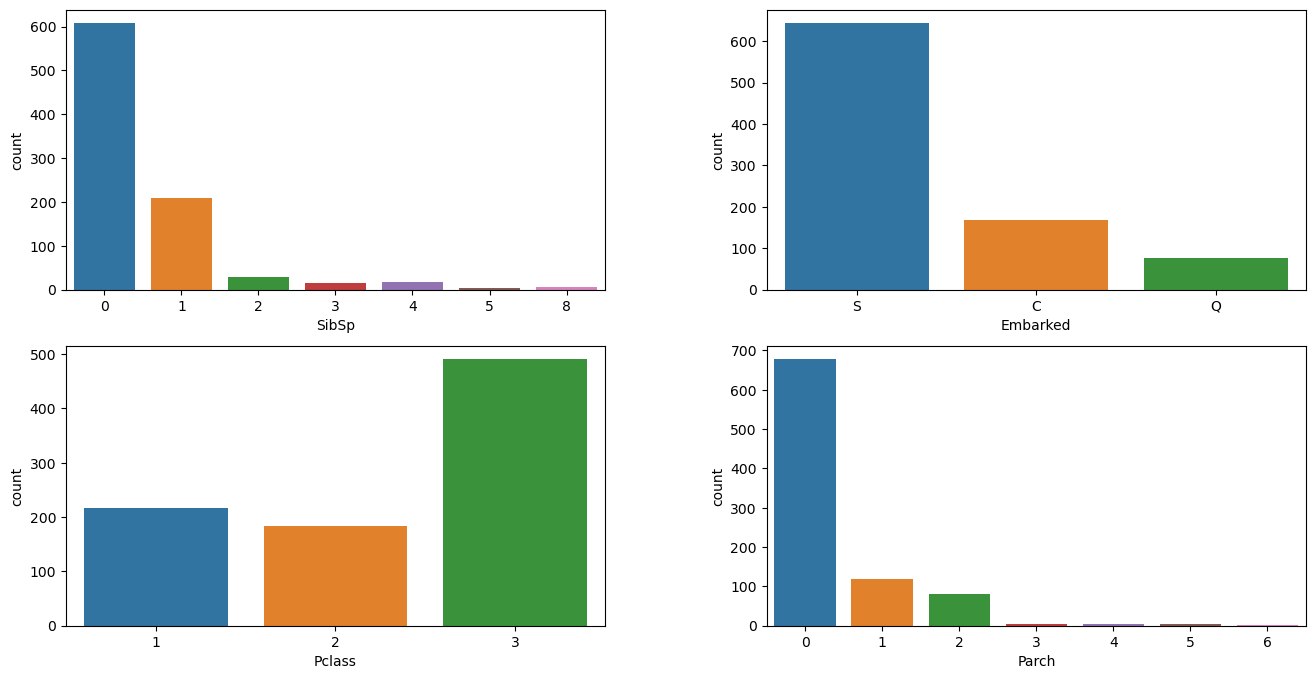

In [17]:
fig, axs = plt.subplots(2,2,figsize=(16,8), gridspec_kw={'wspace': 0.3})
sns.countplot(x= 'SibSp',data = df,  ax = axs[0,0])
sns.countplot(x='Embarked', data=df, ax = axs[0,1])
sns.countplot(x='Pclass', data=df, ax=axs[1, 0])  
sns.countplot(x='Parch', data = df, ax=axs[1, 1])
plt.show()

In [18]:
pd.DataFrame(df.groupby(['Sex','Survived'])['Survived'].count())

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

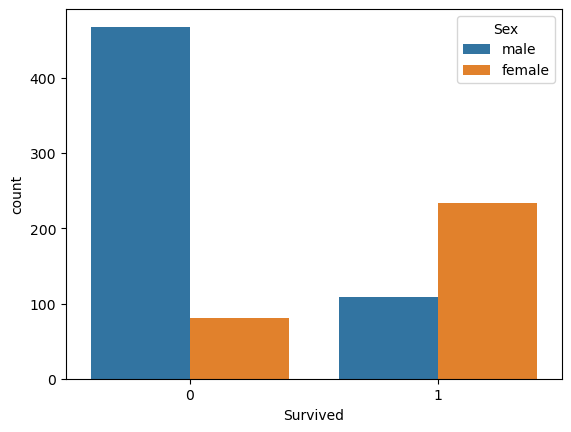

In [19]:
sns.countplot(x = "Survived", hue = "Sex", data = df)
plt.show()

In [20]:
pd.DataFrame(df.groupby(['Pclass','Survived'])['Survived'].count())

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

<Axes: xlabel='Pclass', ylabel='count'>

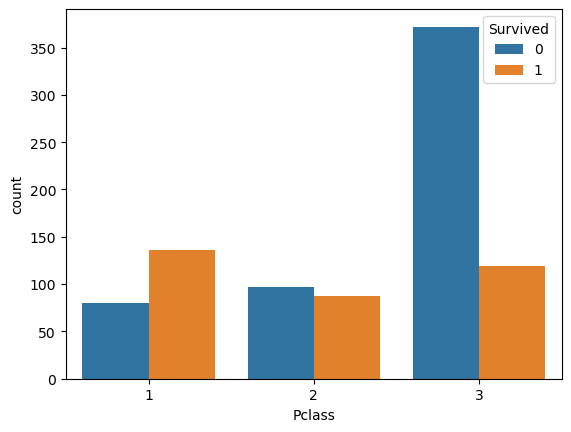

In [21]:
sns.countplot(x='Pclass', hue = "Survived",data=df)

In [22]:
pd.DataFrame(df.groupby(['Embarked','Survived'])['Survived'].count())

Survived
Embarked Survived          
C        0               75
         1               93
Q        0               47
         1               30
S        0              427
         1              217

<Axes: xlabel='Embarked', ylabel='count'>

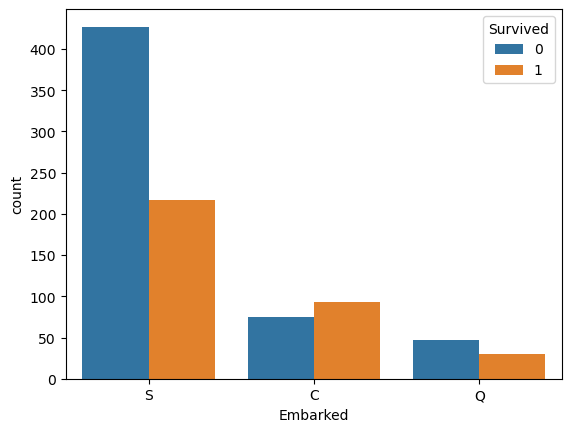

In [23]:
sns.countplot(x='Embarked', hue = "Survived",data=df)

In [24]:
 pd.DataFrame(df.groupby(['Pclass','Sex', 'Survived'])['Survived'].count())

Survived
Pclass Sex    Survived          
1      female 0                3
              1               91
       male   0               77
              1               45
2      female 0                6
              1               70
       male   0               91
              1               17
3      female 0               72
              1               72
       male   0              300
              1               47